## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to
borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another
dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to
sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end,
and the economy restores to a healthy state.
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They
have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting
the demand for these shared bikes in the American market. 

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some
factors.

## Objective & Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary
with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way
for management to understand the demand dynamics of a new market.

Steps:
1. Explore and visualize the dataset EDA.
2. Build a linear regression model to predict the demand for shared bikes.

## Data Dictionary 

1. instant: record index
2. dteday : date
3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2018, 1:2019)
5. mnth : month ( 1 to 12)
6. holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. temp : temperature in Celsius
11. atemp: feeling temperature in Celsius
12. hum: humidity
13. windspeed: wind speed
14. casual: count of casual users
15. registered: count of registered users
16. cnt: count of total rental bikes including both casual and registered

## Necessary libraries

In [103]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from datetime import date

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
#pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


from matplotlib import pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
mmscaler = MinMaxScaler()

### Import & Overview of the Data

In [104]:
bikes = pd.read_csv('day.csv')
print(f'There are {bikes.shape[0]} rows and {bikes.shape[1]} columns.')

bikes.head()

There are 730 rows and 16 columns.


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305,11.463,43.696,12.522,82,1518,1600


- Observations :
   * The dataset contain 730 rows and 16 columns.

In [105]:
bikes.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,730.000,NaN,NaN,NaN,365.500,210.877,1.000,183.250,365.500,547.750,730.000
dteday,730,730,01-01-2018,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,730.000,NaN,NaN,NaN,2.499,1.110,1.000,2.000,3.000,3.000,4.000
yr,730.000,NaN,NaN,NaN,0.500,0.500,0.000,0.000,0.500,1.000,1.000
mnth,730.000,NaN,NaN,NaN,6.526,3.450,1.000,4.000,7.000,10.000,12.000
holiday,730.000,NaN,NaN,NaN,0.029,0.167,0.000,0.000,0.000,0.000,1.000
weekday,730.000,NaN,NaN,NaN,2.997,2.006,0.000,1.000,3.000,5.000,6.000
workingday,730.000,NaN,NaN,NaN,0.684,0.465,0.000,0.000,1.000,1.000,1.000
weathersit,730.000,NaN,NaN,NaN,1.395,0.545,1.000,1.000,1.000,2.000,3.000
temp,730.000,NaN,NaN,NaN,20.319,7.507,2.424,13.812,20.466,26.881,35.328


In [106]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Observations:
    * Most of the Data are Numerical.
    * dteday is an object type variable that represent dates, we will need to deal with it differently.

In [107]:
## lets convert the dteday object to categorical
bikes["dteday"] = bikes["dteday"].astype("category")
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    category
 2   season      730 non-null    int64   
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    int64   
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    int64   
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    int64   
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(1), float64(4), int64(11)
memory usage: 109.0 KB


In [108]:
## Check for missing values
bikes.isnull().sum().sort_values(ascending=False)/bikes.shape[0]*100

instant      0.000
dteday       0.000
season       0.000
yr           0.000
mnth         0.000
holiday      0.000
weekday      0.000
workingday   0.000
weathersit   0.000
temp         0.000
atemp        0.000
hum          0.000
windspeed    0.000
casual       0.000
registered   0.000
cnt          0.000
dtype: float64

- Observations:
    * No missing values detected.

In [109]:
# check the unique values in each column of the dataframe
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

- Observations:
    * the variables [instant, dteday] are unique and cannot add any value to the model and it need to be removed.

In [110]:
bikes = bikes.drop(['instant', 'dteday'], axis=1)

In [111]:
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.111,18.181,80.583,10.750,331,654,985
1,1,0,1,0,0,0,2,14.903,17.687,69.609,16.652,131,670,801
2,1,0,1,0,1,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,1,0,1,0,2,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,1,0,1,0,3,1,1,9.305,11.463,43.696,12.522,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.421,11.332,65.292,23.459,247,1867,2114
726,1,1,12,0,5,1,2,10.387,12.752,59.000,10.417,644,2451,3095
727,1,1,12,0,6,0,2,10.387,12.120,75.292,8.334,159,1182,1341
728,1,1,12,0,0,0,1,10.489,11.585,48.333,23.501,364,1432,1796


## EDA

### Detect & Deal with Outlier

In [112]:
numeric_columns = bikes.select_dtypes(include=np.number).columns.tolist()

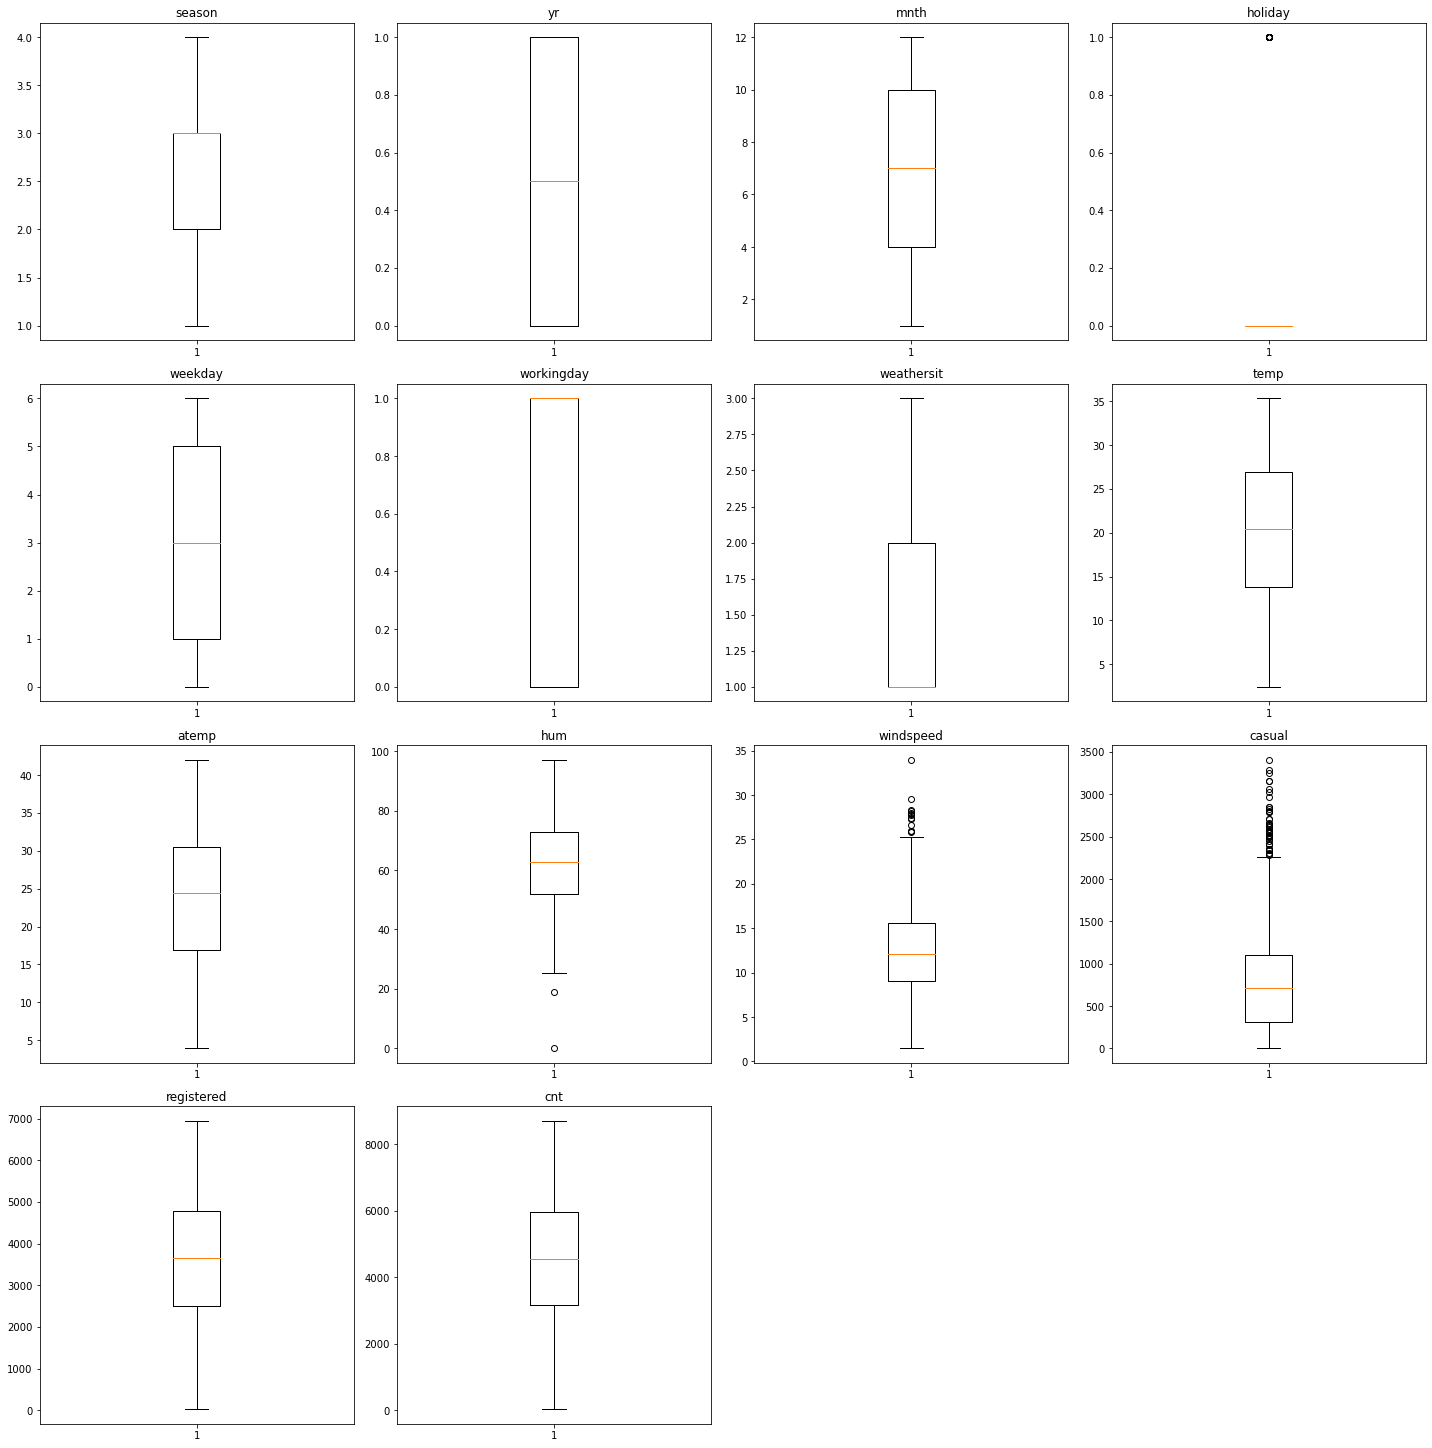

In [113]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 25))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(bikes[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Observations:
    * Outliers observed on the [windspeed, casual] variables

In [114]:
# Let's treat outliers
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df


def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df

bikes = treat_outliers_all(bikes, ['windspeed', 'casual'])

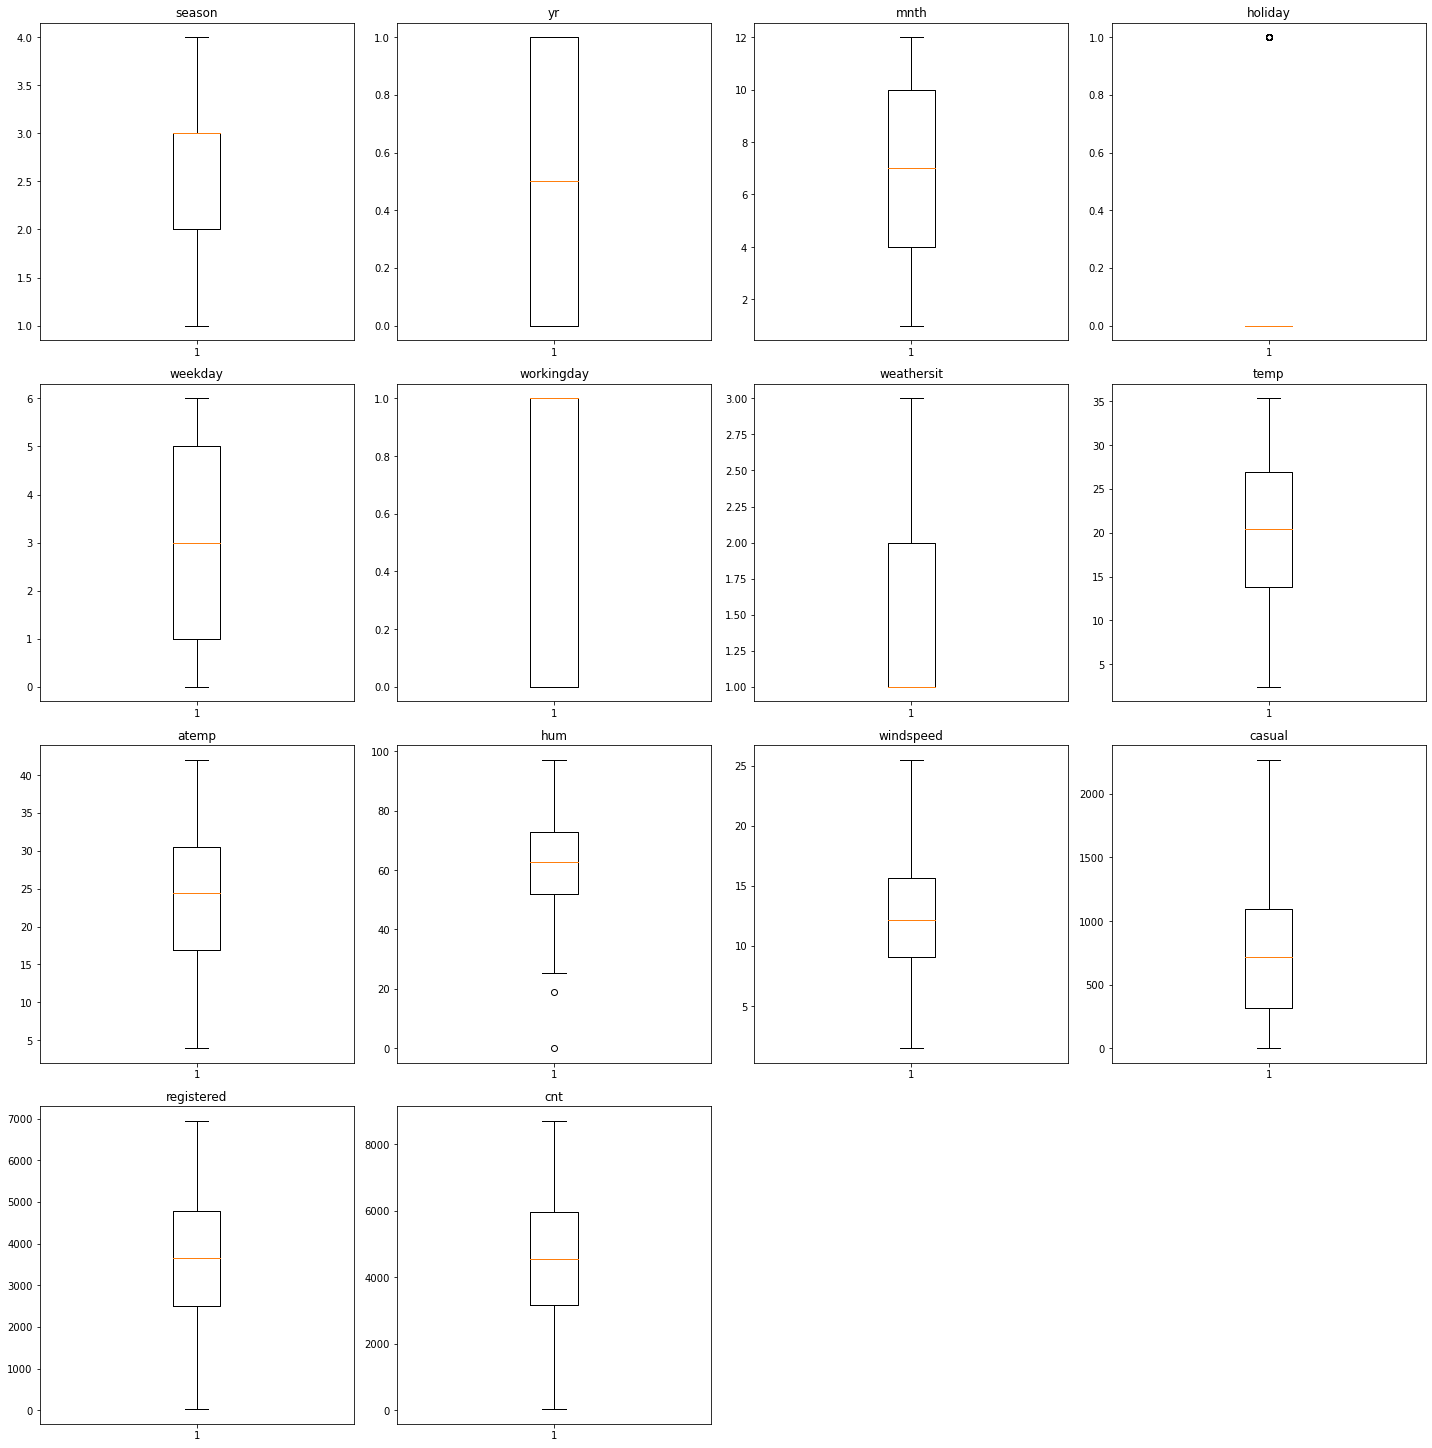

In [115]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 25))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(bikes[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Visualization

#### Univariate Analysis

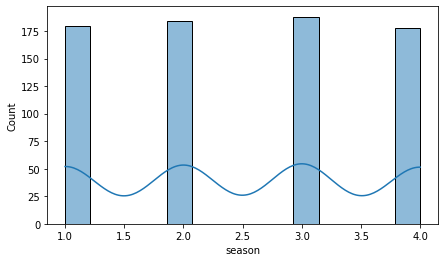

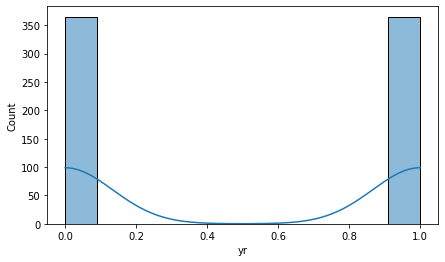

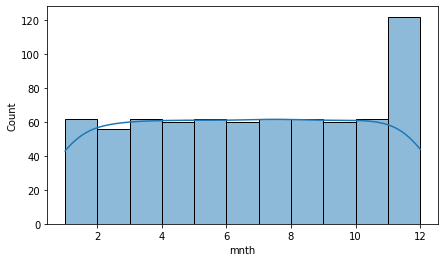

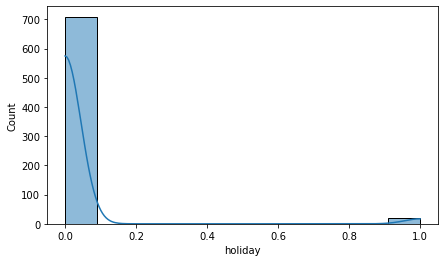

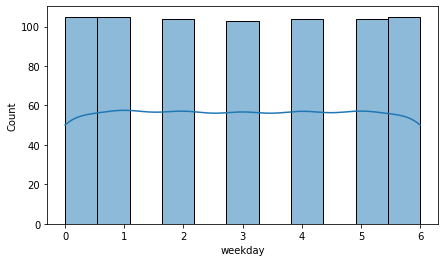

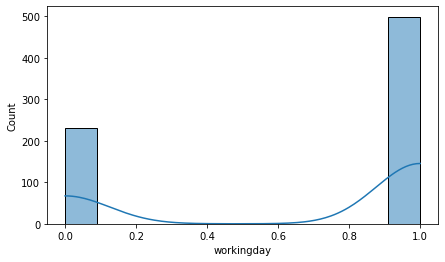

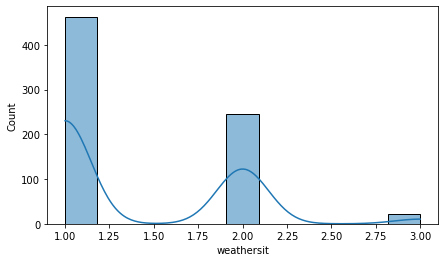

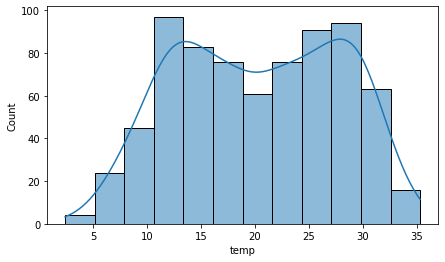

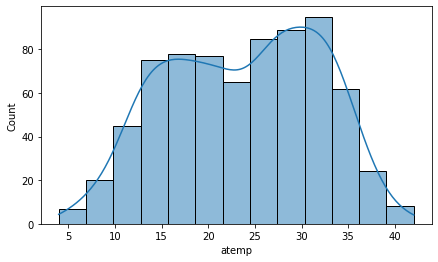

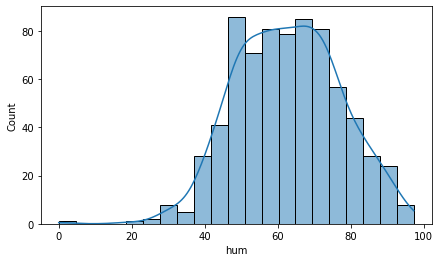

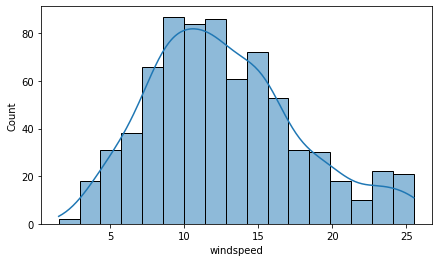

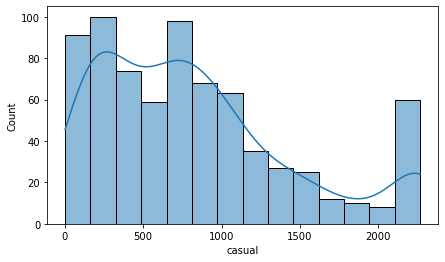

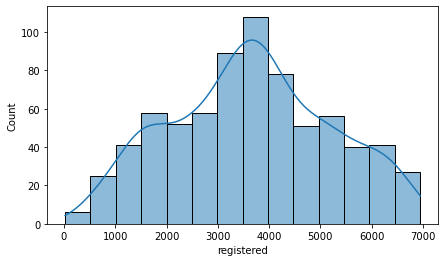

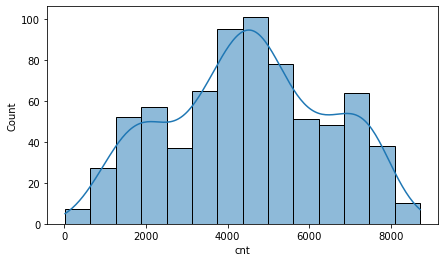

In [116]:
# let's plot all the columns to look at their distributions
for i in numeric_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=bikes, x=i, kde = True)
    plt.show()

- Observations:
    * Variables such as [temp, atemp, windspeed, registred, cnt] are normally distributed.
    * Variables 'hum' is positively skewed, and 'casual' is a bit negatively skewed distribution.

#### Bivariate Analysis

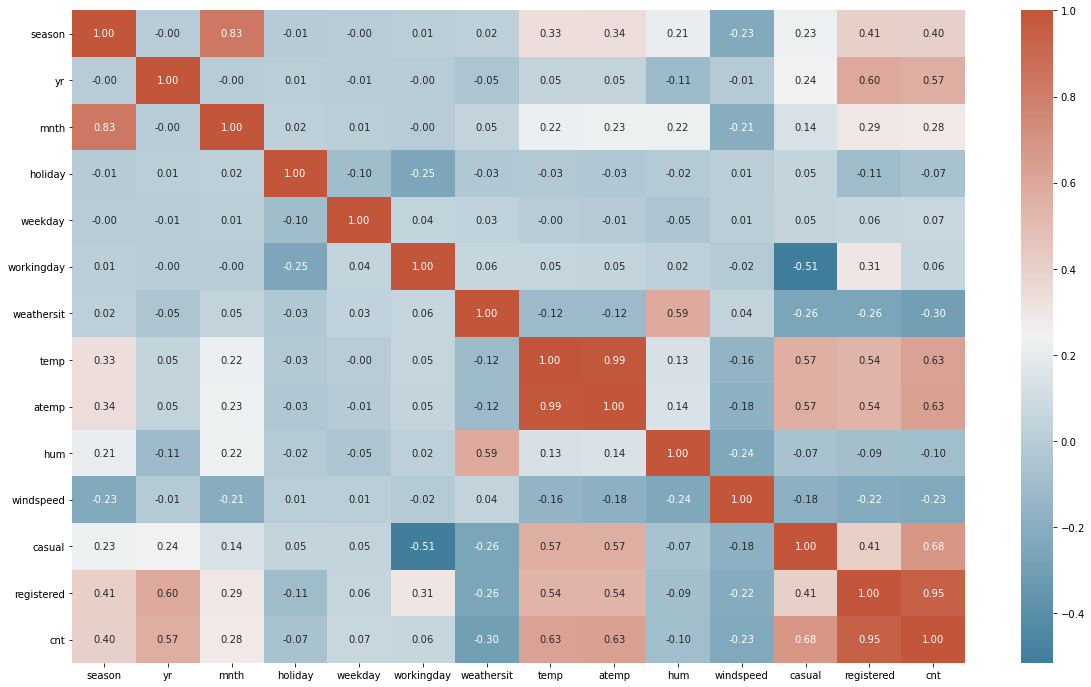

In [117]:
plt.figure(figsize=(20,12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(bikes.corr(),annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()

- Observations:
    * Variables with significant correlation relation :
        * season with mnth.
        * yr with registred.
        * temp with atemp.
        * casual with cnt.
        * registred with cnt.

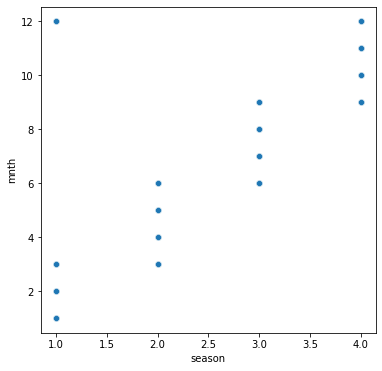

In [180]:
# scatterplot to visualize the relationship between season and mnth
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'season', y = 'mnth', data = bikes)
plt.show()

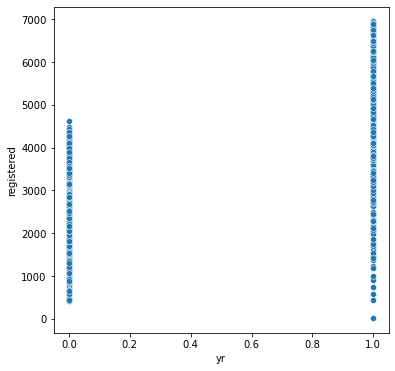

In [182]:
# scatterplot to visualize the relationship between yr and registred
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'yr', y = 'registered', data = bikes)
plt.show()

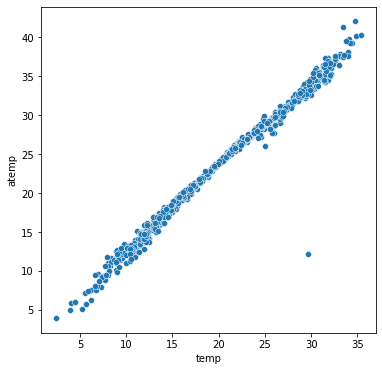

In [183]:
# scatterplot to visualize the relationship between season and mnth
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'temp', y = 'atemp', data = bikes)
plt.show()

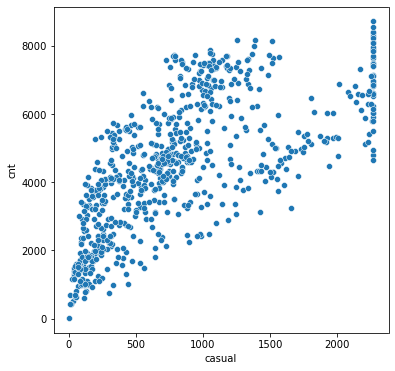

In [184]:
# scatterplot to visualize the relationship between season and mnth
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'casual', y = 'cnt', data = bikes)
plt.show()

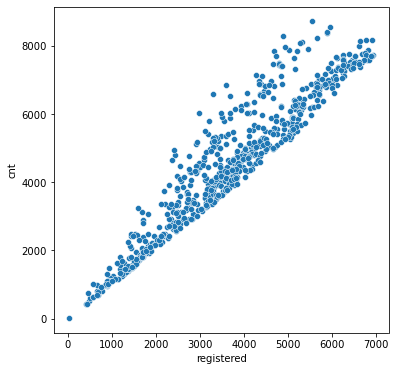

In [186]:
# scatterplot to visualize the relationship between season and mnth
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'registered', y = 'cnt', data = bikes)
plt.show()

## Regression Modeling

### Splitting the Data into Training and Testing Sets

In [119]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [120]:
# Apply scaler() to all the numerical columns
df_train[numeric_columns] = mmscaler.fit_transform(df_train[numeric_columns])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,1.000,1.000,0.818,0.000,0.333,1.000,0.000,0.510,0.501,0.575,0.414,0.406,0.952,0.864
576,0.667,1.000,0.545,0.000,0.333,1.000,0.000,0.815,0.766,0.726,0.364,0.427,0.899,0.828
426,0.000,1.000,0.182,0.000,1.000,0.000,0.500,0.442,0.439,0.640,0.351,0.421,0.446,0.465
728,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.245,0.200,0.498,0.912,0.160,0.204,0.204
482,0.333,1.000,0.273,0.000,1.000,0.000,0.500,0.396,0.392,0.505,0.259,0.494,0.445,0.483


### Dividing into X and Y sets for the model building

In [121]:
y_train = df_train.pop('cnt')
X_train = df_train

In [122]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [123]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', False, 2),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', False, 3),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1)]

In [124]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered'],
      dtype='object')

In [125]:
X_train.columns[~rfe.support_]

Index(['season', 'holiday', 'weathersit'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [126]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [127]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [128]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [129]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.399e+04
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:46:40   Log-Likelihood:                 1613.8
No. Observations:                 510   AIC:                            -3206.
Df Residuals:                     499   BIC:                            -3159.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0090      0.003     -2.776      0.0

- Observations:
    * [mnth, temp, atemp, hum, windspeed] are insignificant variables and need to be dropped.

In [130]:
X_train_new = X_train_rfe.drop(['mnth', 'temp', 'atemp', 'hum', 'windspeed'], axis = 1)

In [131]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [132]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [133]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.701e+04
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:46:40   Log-Likelihood:                 1606.0
No. Observations:                 510   AIC:                            -3200.
Df Residuals:                     504   BIC:                            -3175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.002     -3.169      0.0

- Observations:
    * workingday is insignificant variable and need to be dropped.

In [134]:
X_train_new_2 = X_train_new.drop(['workingday'], axis = 1)

In [135]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new_2)

In [136]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [137]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.870e+04
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:46:40   Log-Likelihood:                 1605.2
No. Observations:                 510   AIC:                            -3200.
Df Residuals:                     505   BIC:                            -3179.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.001     -2.912      0.0

In [138]:
X_train_new_2.columns

Index(['const', 'yr', 'weekday', 'casual', 'registered'], dtype='object')

In [139]:
X_train_new_2 = X_train_new_2.drop(['const'], axis=1)

In [140]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered,7.180
0,yr,3.250
2,casual,3.250
1,weekday,2.490


#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [141]:
y_train_bikes = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

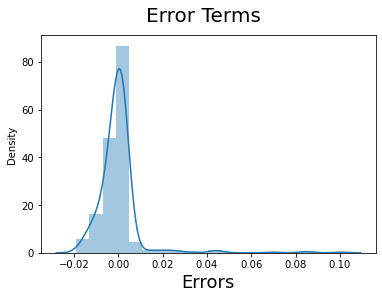

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bikes), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Building model using Sklearn

In [143]:
lr = LinearRegression()
lr.fit(X_train_new_2, y_train)

LinearRegression()

### Making Predictions

In [160]:
df_test[numeric_columns] = mmscaler.fit_transform(df_test[numeric_columns])
df_train = mmscaler.fit_transform(df_train)

In [145]:
y_test = df_test.pop('cnt')
X_test = df_test

In [161]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_2.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Creating X_train_new_2 dataframe by dropping variables from X_train
X_train_new = X_train[X_train_new_2.columns]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

In [163]:
# Making predictions test data
y_pred_test = lm.predict(X_test_new)
y_pred_skl_test = lr.predict(X_test[X_train_new_2.columns])

# Making predictions train data
y_pred_train = lm.predict(X_train_new)
y_pred_skl_train = lr.predict(X_train_new[X_train_new_2.columns])

### Models Evaluation

Text(0, 0.5, 'y_pred_train')

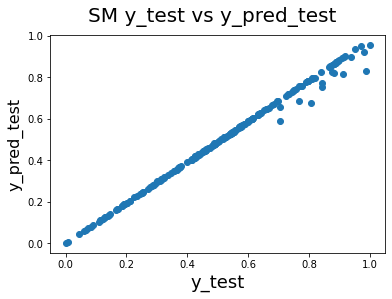

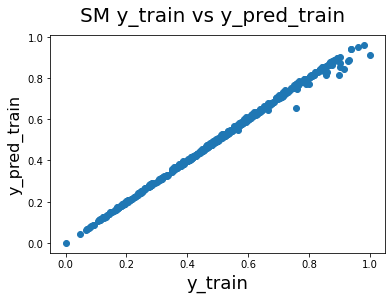

In [169]:
# Plotting y_test and y_pred_test to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('SM y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)                          # Y-label

# Plotting y_train and y_pred_train to understand the spread.
fig = plt.figure()
plt.scatter(y_train, y_pred_train)
fig.suptitle('SM y_train vs y_pred_train', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred_train', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred_train')

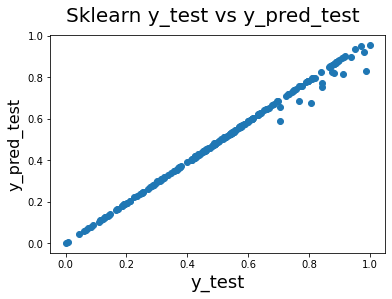

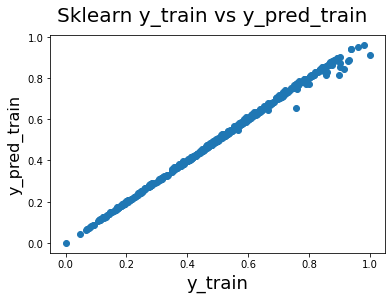

In [172]:
# Plotting y_test and y_pred_test to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_skl)
fig.suptitle('Sklearn y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)                          # Y-label

# Plotting y_train and y_pred_train to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred_skl_train)
fig.suptitle('Sklearn y_train vs y_pred_train', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred_train', fontsize=16)                          # Y-label

In [178]:
sm_train_r_squared_sm = r2_score(y_train, y_pred_train)
sm_train_r_squared_skl = r2_score(y_train, y_pred_skl_train)

sm_test_r_squared_sm = r2_score(y_test, y_pred_test)
sm_test_r_squared_skl = r2_score(y_test, y_pred_skl_test)

print('SM Model evaluation :')
print('sm train set r_square_value :',sm_train_r_squared_sm)
print('sm test set r_square_value :',sm_test_r_squared_sm)
print()
print('Sklearn Model evaluation :')
print('sklearn train set r_square_value :',sm_train_r_squared_skl)
print('sklearn test set r_square_value :',sm_test_r_squared_skl)

SM Model evaluation :
sm train set r_square_value : 0.9978537219277529
sm test set r_square_value : 0.9899276000903946

Sklearn Model evaluation :
sklearn train set r_square_value : 0.9978537219277529
sklearn test set r_square_value : 0.9899276000903947


- Observation :
    * Both SM and SKlearn regression models are showing a very good performance using the r_square as evaluation metric.
    * No Overfitting on the model comparing the metrics between the train and test data sets.

### Variable Importance

Feature: yr, Score: 0.00401
Feature: weekday, Score: 0.00371
Feature: casual, Score: 0.28184
Feature: registered, Score: 0.78683


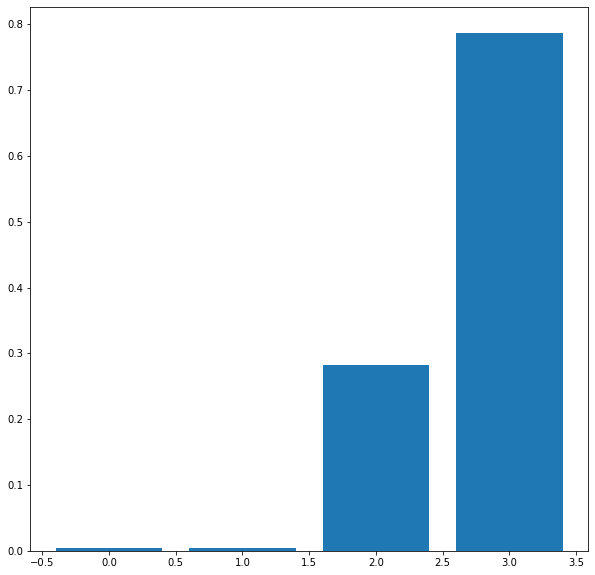

In [207]:
importance = lr.coef_
cols = X_train_new_2.columns

# feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (cols[i],v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()